# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [1]:
!pip install matplotlib --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install sklearn --upgrade

     |████████████████████████████████| 11.2 MB 928 kB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=e63f75fc95e1233a9746cae489a7be81b5fd9548f5673d55942857a1b2111988
  Stored in directory: /home/ledragox/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [84]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sklearn.metrics as metrics

data_table = pd.read_csv('data/advertising.csv')
display(data_table)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

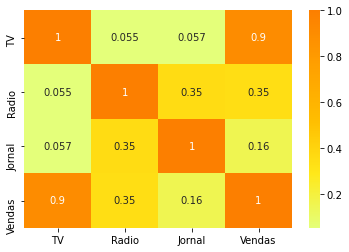

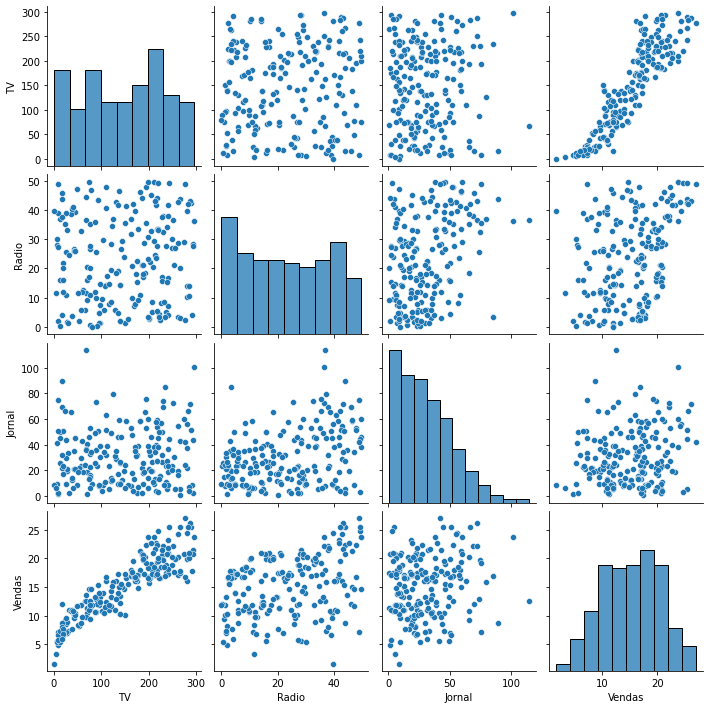

In [85]:
sns.heatmap(data_table.corr(), cmap="Wistia", annot=True)
plt.show()

sns.pairplot(data_table)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [86]:
from sklearn.model_selection import train_test_split

# Separate info into X and Y 
# Y - value we want to discover
y = data_table["Vendas"]
# X - the remaining
x = data_table.drop("Vendas", axis=1)

# Apply train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linearregression_model = LinearRegression()
randomforest_model = RandomForestRegressor()

linearregression_model.fit(x_train, y_train)
randomforest_model.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [91]:
predict_linearregression = linearregression_model.predict(x_test)
predict_randomforest = randomforest_model.predict(x_test)

percentages = []
percentages.append(metrics.r2_score(y_test, predict_linearregression))
percentages.append(metrics.r2_score(y_test, predict_randomforest))

print("Linear Regression:", percentages[0], "\nRandom Forest:", percentages[1])
percentages.sort()
print("The best value is:", percentages[-1])

Linear Regression: 0.8916617322354591 
Random Forest: 0.9559483563205244
The best value is: 0.9559483563205244


#### Visualização Gráfica das Previsões

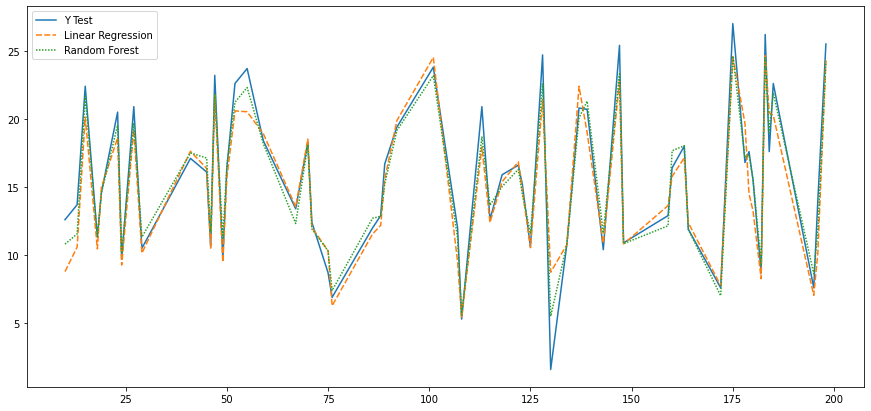

In [89]:
# Empty table
aux_table = pd.DataFrame()
# Fill the columns
aux_table["Y Test"] = y_test
aux_table["Linear Regression"] = predict_linearregression
aux_table["Random Forest"] = predict_randomforest

plt.figure(figsize=(15, 7))
sns.lineplot(data=aux_table)
plt.show()

#### Qual a importância de cada variável para as vendas?

<AxesSubplot:>

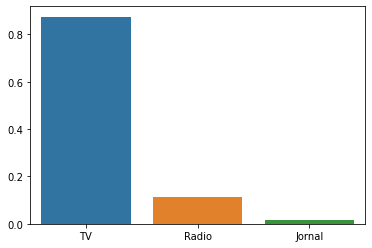

In [93]:
sns.barplot(x=x_train.columns, y=randomforest_model.feature_importances_)

#### Como fazer uma nova previsão?

In [ ]:
# import a new table with pandas (the new table need to have the columns TV, Radio and Jornal)
# new_predict = randomforest_model.predict(new_table)
# print(new_predict)